In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} </style>"))

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from datetime import datetime as dt, timedelta

In [29]:
def save_data(df, txt):
    df.to_csv(txt, index=False, encoding="utf-8-sig")
def read_data(txt):
    return pd.read_csv(txt, encoding='utf-8-sig')

In [80]:
table = read_data("Data-Results/plant11_data.csv")

In [81]:
table.columns

Index(['mea_ddhr', 'cond_24hr', 'tem_in_loc', 'hum_in_loc', 'tem_coil_loc',
       'tem_out_loc', 'hum_out_loc', 'cond_loc1', 'tem_in_loc_24hr',
       'hum_in_loc_24hr', 'tem_coil_loc_24hr', 'year', 'month', 'day', 'hour',
       'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7',
       'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
       'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19',
       'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25',
       'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31',
       'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37',
       'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43',
       'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49',
       'week_50', 'week_51', 'week_52', 'dj_aws_tem', 'dj_aws_wind_d',
       'dj_aws_wind_s', 'dj_aws_hum', 'sp_aws_tem', 'sp_aws_wind_d',
       'sp_aws_wind_s', 'sp_aws_spot_pr', 'sp_aws_

# 예제

RNN은 반복할 때 이전에 계산한 정보를 재사용하는 for루프나 다름없음

In [36]:
timesteps = 100 # 입력 시퀀스에 있는 타임스텝의 수
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features)) # 입력데이터: 예제를 위해 생성한 난수

state_t = np.zeros((output_features, )) # 초기 상태: 모두 0인 벡터

# 랜덤한 가중치 행렬을 만듦
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = list()
for input_t in inputs: # input_t는 크기가 (input_features,) 인 벡터
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
                                             # 입력과 현재 상태(이전 출력)를 연결하여 현재 출력을 얻음
    successive_outputs.append(output_t)
    
    state_t = output_t # 다음 타입스텝을 위해 네트워크의 상태를 업데이트
    
final_output_sequence = np.stack(successive_outputs, axis=0)
# 최종 출력은 크기가 (timesteps, output_features)인 2D Tensor

In [39]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [42]:
max_features = 10000 # 특성으로 사용할 단어의 수
max_len = 500 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
batch_size = 32

In [47]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

In [49]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 51s 3ms/sample - loss: 0.5439 - acc: 0.7340 - val_loss: 0.4259 - val_acc: 0.8316
Epoch 2/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.3139 - acc: 0.8742 - val_loss: 0.3030 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 50s 2ms/sample - loss: 0.2463 - acc: 0.9057 - val_loss: 0.2943 - val_acc: 0.8814
Epoch 4/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.2053 - acc: 0.9238 - val_loss: 0.2990 - val_acc: 0.8746
Epoch 5/10
20000/20000 [==============================] - 51s 3ms/sample - loss: 0.1779 - acc: 0.9349 - val_loss: 0.3364 - val_acc: 0.8530
Epoch 6/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.1619 - acc: 0.9430 - val_loss: 0.3035 - val_acc: 0.8778
Epoch 7/10
20000/20000 [==============================] - 50s 2ms/sample - loss: 0.1467 - acc: 0.9472 - val_loss: 0.3

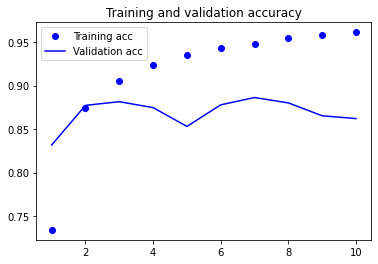

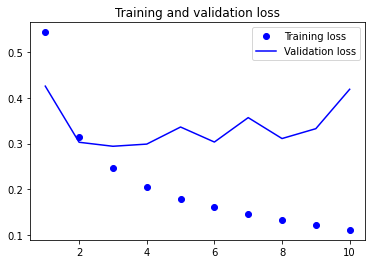

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 습도 예측을 해봅시다

In [160]:
save = table.copy()

In [ ]:
table.drop(['cond_24hr', ])

In [53]:
float_data = np.zeros((len(table), len(table.columns)-1))

In [75]:
for i, line in enumerate(table.values):
    values = [float(x) for x in line[1:]]
    float_data[i, :] = values

In [76]:
table.columns

Index(['mea_ddhr', 'cond_24hr', 'tem_in_loc', 'hum_in_loc', 'tem_coil_loc',
       'tem_out_loc', 'hum_out_loc', 'cond_loc1', 'tem_in_loc_24hr',
       'hum_in_loc_24hr', 'tem_coil_loc_24hr', 'year', 'month', 'day', 'hour',
       'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7',
       'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
       'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19',
       'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25',
       'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31',
       'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37',
       'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43',
       'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49',
       'week_50', 'week_51', 'week_52', 'dj_aws_tem', 'dj_aws_wind_d',
       'dj_aws_wind_s', 'dj_aws_hum', 'sp_aws_tem', 'sp_aws_wind_d',
       'sp_aws_wind_s', 'sp_aws_spot_pr', 'sp_aws_

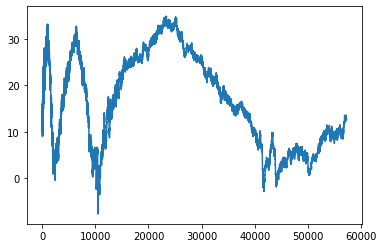

In [77]:
temp = float_data[:, 3]
plt.plot(range(len(temp)), temp)

In [123]:
table.iloc[15780]

mea_ddhr         2018-06-12 00:00:00
cond_24hr                          0
tem_in_loc                     24.74
hum_in_loc                     61.84
tem_coil_loc                   24.06
                        ...         
asos_spot_pr                   998.3
asos_sea_pr                   1001.7
asos_hum                        95.3
asos_sun                       11.75
asos_sun_time                  11400
Name: 15780, Length: 98, dtype: object

In [124]:
mean = float_data[15780:].mean(axis=0)
float_data -= mean
std = float_data[15780:].std(axis=0)
float_data /= std

C:\Users\COM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [128]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i+= len(rows)
        
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            #print(data[indices].shape)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [127]:
table.iloc[11843]

mea_ddhr         2018-03-22 00:00:00
cond_24hr                          0
tem_in_loc                      8.99
hum_in_loc                     57.81
tem_coil_loc                    8.31
                        ...         
asos_spot_pr                  1013.2
asos_sea_pr                   1016.8
asos_hum                        97.7
asos_sun                        3.54
asos_sun_time                      0
Name: 11843, Length: 98, dtype: object

In [129]:
lookback = 1000
step = 6
delay = 144
batch_size = 128

# 10분간격
train_gen = generator(float_data, lookback=1440, delay=144, min_index=15780, max_index=57188, shuffle=True, step=6, batch_size=batch_size)

# 30분 간격
val_gen = generator(float_data, lookback=480, delay=48, min_index=11843, max_index=15779, step=2, batch_size=batch_size)

# 1시간/3시간 간격
test_gen = generator(float_data, lookback=80, delay=8, min_index=0, max_index=11842, step=1, batch_size=batch_size)

val_steps = (15779 - 11843 - 480) // batch_size # 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
test_steps = (11842 - 0 - 80) // batch_size

In [148]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=15780, max_index=40000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=40001, max_index=50000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=50001, max_index=None, step=step, batch_size=batch_size)

val_steps = (50000 - 40001 - lookback) // batch_size # 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
test_steps = (len(float_data) - 50001 - lookback) // batch_size

In [143]:
def evaluate_naive_method():
    batch_maes = list()
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds-targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [144]:
evaluate_naive_method()

0.10422642030177559


In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data[15780:].shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 21s 43ms/step - loss: nan - val_loss: nan
Epoch 2/20
500/500 [==============================] - 21s 42ms/step - loss: nan - val_loss: nan
Epoch 3/20
500/500 [==============================] - 22s 43ms/step - loss: nan - val_loss: nan
Epoch 4/20
500/500 [==============================] - 23s 45ms/step - loss: nan - val_loss: nan
Epoch 5/20
500/500 [==============================] - 22s 45ms/step - loss: nan - val_loss: nan
Epoch 6/20
500/500 [==============================] - 22s 45ms/step - loss: nan - val_loss: nan
Epoch 7/20
500/500 [==============================] - 23s 45ms/step - loss: nan - val_loss: nan
Epoch 8/20
500/500 [==============================] - 22s 45ms/step - loss: nan - val_loss: nan
Epoch 9/20
500/500 [==============================] - 22s 43ms/step - loss: nan - val_loss: nan
Epoch 10/20
500/500 [==============================] - 21s 43ms/step - loss: nan - val_loss: nan
Epoch 11/20
500/500 [==================

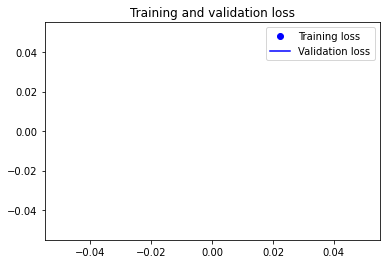

In [161]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [150]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: 'acc'

In [156]:
history.history

{'loss': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_loss': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]}